# 기계학습(Machine Learning)
## 기계학습의 분류
* 지도학습(supervised Learning)
* 자율학습(비지도학습, unsupervised Learning)
# SVM(support vector machine)
## 분류(classification)
* support-vector clustering(SVC)
## 회귀(regression)
* support-vector regression(SVR)
## 초평면(hyperplane)
## SVM 알고리즘
## 소프트 마진(soft-margin)

## 선형분류

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [19]:
# data loed
iris = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv')
iris

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [20]:
### 설명변수(x)와 반응변수(y)
x = iris.iloc[50:,3:5]
y = iris.iloc[50:,5]

In [5]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [6]:
### SVM
svc = SVC(kernel='linear', C=1)
model = svc.fit(x_train, y_train)

In [7]:
### 예측
y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica'], dtype=object)

In [8]:
### accuracy
model.score(x_test, y_test)

0.9

In [9]:
### 교차표
pd.crosstab(y_test, y_pred)

col_0,versicolor,virginica
Species,,
versicolor,17,2
virginica,2,19


In [10]:
### classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  versicolor       0.89      0.89      0.89        19
   virginica       0.90      0.90      0.90        21

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



## ▣ 문제

In [25]:
# data loed
mtcars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
mtcars.shape

(32, 12)

In [26]:
### 입력변수(x)와 출력변수(y)
x = mtcars[['mpg','am']]
x.std = StandardScaler().fit_transform(x)
y = mtcars.vs

In [13]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [14]:
### SVM
svc = SVC(kernel='linear', C=1)
model = svc.fit(x_train, y_train)

In [15]:
### 예측
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0])

In [16]:
### accuracy
model.score(x_test, y_test)

0.6923076923076923

## 다중 클래스 분류
* 3개 이상의 클래스(범주)가 있는 경우

In [ ]:
# data loed
house = pd.read_csv('http://youngho.iwinv.net/data/house_price_prediction.csv')
house.shape

(3421, 19)

In [ ]:
### 입력변수(x)와 출력변수(y)
x = house[['bedrooms','sqft_living','view','condition','yr_built']]
x.std = StandardScaler().fit_transform(x)
y = house['price_cat']

In [ ]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std,y,test_size=0.4)

In [ ]:
### SVM
svc = SVC(kernel='linear', C=1)
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)
y_pred

array(['Class3', 'Class2', 'Class2', ..., 'Class3', 'Class3', 'Class3'],
      dtype=object)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.464572680788897

### 비선형 분류
- 커널(kernel) 사용
   - 커널 기법은 주어진 데이터를 고차원 특징 공간으로 사상해주는 것

* 커널의 종류
    * Gaussian RBF, Polynomial, Sigmoid 등

 - Parameter
     - RBF(Radial Basis Function): Cost, Gamma
     - Polynomial: Cost, Gamma, Coef, Degree
     - Sigmoid: Cost, Gamma, Coef

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],
                    marker="+", label=cl)

In [ ]:
# 랜덤 시드를 지정합니다.
np.random.seed(0)

# 두 개의 특성을 만듭니다.
features = np.random.randn(200, 2)

# 선형적으로 구분할 수 없는 클래스를 만듭니다.
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

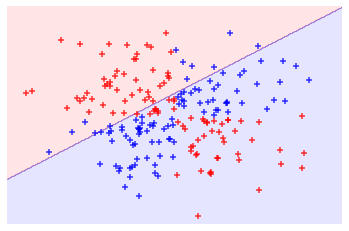

In [ ]:
# 선형 커널을 사용한 서포트 벡터 분류기를 만듭니다. with a linear kernel
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# 모델을 훈련합니다.
svc_linear.fit(features, target)

# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

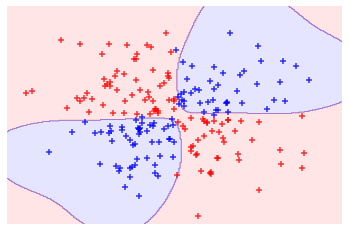

In [ ]:
# 방사 기저 함수 커널을 사용한 서포트 벡터 머신을 만듭니다.
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# 분류기를 훈련합니다.
model = svc.fit(features, target)

# 샘플과 초평면을 그립니다.
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

### RBF Parameter: Cost, Gamma
* Cost

    - 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정
    - 작을 수록 많이 허용하고, 클 수록 적게 허용

* Gamma

    - 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정
    - 결정 경계의 곡률을 조정
    - 값이 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아짐
    - 너무 낮으면 과소적합될 가능성이 크고, 너무 높으면 과대적합의 위험이 큼

### - 선형 분류
* 자료: house_price_prediction.csv

In [ ]:
# data loed
house = pd.read_csv('http://youngho.iwinv.net/data/house_price_prediction.csv')
house.shape

(3421, 19)

In [ ]:
### 입력변수(x)와 출력변수(y)
x = house[['bedrooms','sqft_living','view','condition','yr_built']]
x.std = StandardScaler().fit_transform(x)
y = house['price_cat']

In [ ]:
### Train & Test data
x_train, x_test, y_train, y_test = train_test_split(x.std, y, test_size=0.4)

In [ ]:
### SVM
svc = SVC(kernel="linear",C=1)
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.47406866325785246

### - 비선형 분류
* kernel="rbf"

In [ ]:
### SVM
svc = SVC(kernel="rbf",C=1, gamma=1)
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.504017531044558

#### - 최적의 모델 결정

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['rbf'],
                    'C': [0.1, 1, 10, 50, 100],
                    'gamma': [0.01, 0.05, 0.1, 0.5, 1]}

In [ ]:
grid = GridSearchCV(SVC(), tuned_parameters)
%time grid.fit(x_train, y_train)

CPU times: user 21.7 s, sys: 8.98 ms, total: 21.7 s
Wall time: 21.7 s


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
### SVM
# svc = SVC(kernel="rbf",C=10, gamma=0.1)
svc = SVC(kernel="rbf",C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
model = svc.fit(x_train, y_train)

In [ ]:
### 예측
y_pred = model.predict(x_test)

In [ ]:
### accuracy
model.score(x_test, y_test)

0.504017531044558